In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image
import io

In [2]:
# Define dataset path
data_dir = r"D:\Prodigal\Pytorch_onnx\DataSets"

In [3]:
# Print dataset path
print("Dataset directory:", data_dir)

Dataset directory: D:\Prodigal\Pytorch_onnx\DataSets


In [4]:
# Print subdirectories (train/test)
print("Train directory exists:", os.path.exists(os.path.join(data_dir, "train")))
print("Test directory exists:", os.path.exists(os.path.join(data_dir, "test")))

# List contents of the dataset folder
print("Contents of dataset folder:", os.listdir(data_dir))


Train directory exists: True
Test directory exists: True
Contents of dataset folder: ['test', 'train']


In [5]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [6]:
print("Train Subdirectories:", os.listdir(os.path.join(data_dir, "train")) if os.path.exists(os.path.join(data_dir, "train")) else "Train folder missing")
print("Test Subdirectories:", os.listdir(os.path.join(data_dir, "test")) if os.path.exists(os.path.join(data_dir, "test")) else "Test folder missing")


Train Subdirectories: ['Cats', 'Dogs']
Test Subdirectories: ['Cats', 'Dogs']


In [7]:
train_cats_path = os.path.join(data_dir, "train", "cats")
train_dogs_path = os.path.join(data_dir, "train", "dogs")

print("Images in Train Cats:", len(os.listdir(train_cats_path)) if os.path.exists(train_cats_path) else "Missing")
print("Images in Train Dogs:", len(os.listdir(train_dogs_path)) if os.path.exists(train_dogs_path) else "Missing")


Images in Train Cats: 4
Images in Train Dogs: 4


In [8]:
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".webp")

print("Invalid files in Train Cats:", [f for f in os.listdir(train_cats_path) if not f.lower().endswith(valid_extensions)] if os.path.exists(train_cats_path) else "Missing")
print("Invalid files in Train Dogs:", [f for f in os.listdir(train_dogs_path) if not f.lower().endswith(valid_extensions)] if os.path.exists(train_dogs_path) else "Missing")


Invalid files in Train Cats: []
Invalid files in Train Dogs: []


In [9]:
# Load dataset
train_data = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)



In [10]:
# Load dataset
test_data = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

In [11]:
# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [12]:
# Load Pretrained ResNet50
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

d:\Prodigal\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Prodigal\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [13]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("GPU Count:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")


CUDA Available: True
GPU Count: 1
GPU Name: NVIDIA GeForce GTX 1650


In [14]:
# Train Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [18]:
import torch.optim as optim

# Define the optimizer (Make sure model is defined)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Use Adam or SGD

# Define loss function
criterion = torch.nn.CrossEntropyLoss()  # For classification problems

# Training loop
for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()  # Reset gradients
    outputs = model(images)  # Forward pass
    loss = criterion(outputs, labels)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update model weights


In [33]:
num_epochs = 10  # Choose optimal epochs
train_losses = []


    




Epoch 1/10, Loss: 0.0001
Epoch 2/10, Loss: 0.0000
Epoch 3/10, Loss: 0.0000
Epoch 4/10, Loss: 0.0000
Epoch 5/10, Loss: 0.0000
Epoch 6/10, Loss: 0.0000
Epoch 7/10, Loss: 0.0000
Epoch 8/10, Loss: 0.0000
Epoch 9/10, Loss: 0.0000
Epoch 10/10, Loss: 0.0000
Final train_losses: [5.825615517096594e-05, 1.0430809993522416e-07, 1.4901160305669237e-08, 1.4901160305669237e-08, 1.4901160305669237e-08, 2.9802318834981634e-08, 4.470347647611561e-08, 5.960463056453591e-08, 8.940693874137651e-08, 1.3411037969035533e-07]


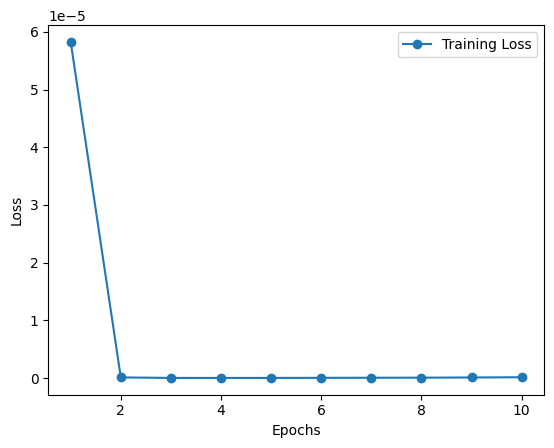

In [34]:
train_losses = []  # Store training losses

for epoch in range(epochs):
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)  # Compute average loss
    train_losses.append(epoch_loss)  # ✅ Append to list
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

# Debug print before plotting
print(f"Final train_losses: {train_losses}") 

# ✅ Ensure x and y values match
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [35]:
import os
# Create directory if it does not exist
os.makedirs("./models", exist_ok=True)

# Save the model
torch.save(model.state_dict(), "./models/resnet50_dog_cat.pth")
print("Model saved successfully!")


Model saved successfully!


In [36]:
# Evaluate Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 50.00%


In [37]:
import os

# Ensure models directory exists
os.makedirs("./models", exist_ok=True)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create dummy input on the same device as the model
dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Move to GPU if available

# Export model to ONNX
torch.onnx.export(model, dummy_input, "./models/resnet50_dog_cat.onnx", 
                  input_names=["input"], output_names=["output"], 
                  dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}})

print("ONNX model saved successfully!")


ONNX model saved successfully!


In [1]:
import os

MODEL_PATH = "models/resnet50_dog_cat.pth"

if not os.path.exists(MODEL_PATH):
    print(f"❌ Model file not found at: {os.path.abspath(MODEL_PATH)}")
else:
    print(f"✅ Model file found at: {os.path.abspath(MODEL_PATH)}")


✅ Model file found at: d:\Prodigal\Pytorch_onnx\Sandip\Pytorch\models\resnet50_dog_cat.pth
